# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline

# Loading the data

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/Mariam-Elmasry/Tuwaiq_Four_Week/master/Pair_EnsambleModels/diabetes.csv?token=AWSBQ4A5B3SNY3ABBFESQE3BV42V2")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Data Cleaning

In [8]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.duplicated().sum()

0

# EDA  Visulazing the distibution of the data for every feature

<AxesSubplot:xlabel='Outcome', ylabel='count'>

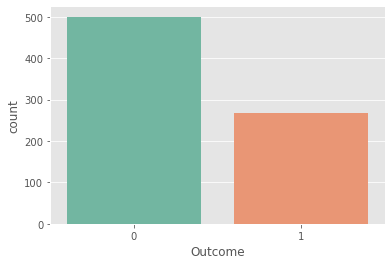

In [11]:
sns.countplot(x ='Outcome', data = df, palette = "Set2")

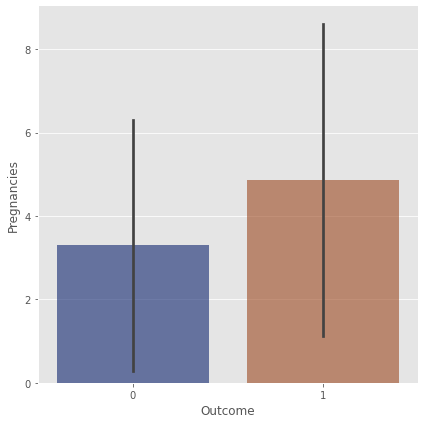

In [15]:
ax= sns.catplot(
    data=df, kind="bar",
    y="Pregnancies", x="Outcome",
    ci="sd", palette="dark", alpha=.6, height=6)

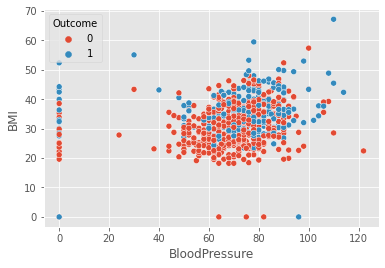

In [18]:
ax=sns.scatterplot(x="BloodPressure",y="BMI",data=df,hue="Outcome")

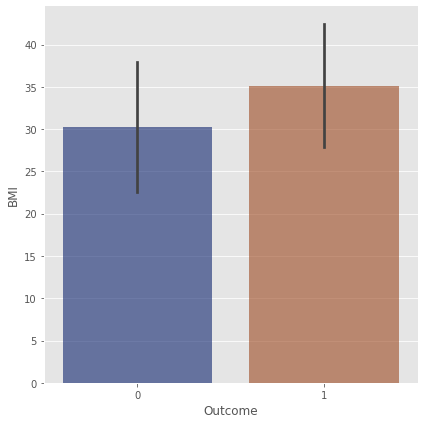

In [32]:
ax= sns.catplot(
    data=df, kind="bar",
    y="BMI", x="Outcome",
    ci="sd", palette="dark", alpha=.6, height=6)

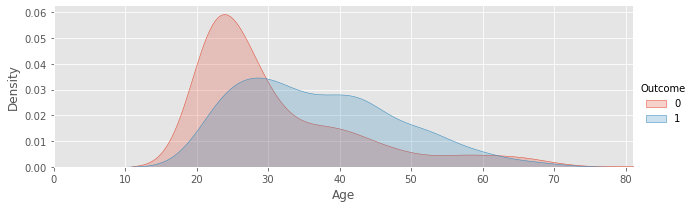

In [106]:
# Visualize the data is to use FacetGrid to plot multiple kedplots on one plot
fig = sns.FacetGrid(df, hue="Outcome", aspect=3)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = df['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

In [ ]:

plt.figure(figsize=(10, 10))

for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    df[df["Outcome"] == 0][column].hist(bins=35, color='blue', label=' Cardiovascular disease = NO', alpha=0.7)
    df[df["Outcome"] == 1][column].hist(bins=35, color='pink', label=' Cardiovascular disease = YES', alpha=0.7)
    plt.legend()
    plt.xlabel(column)

# 4. Baseline Model

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
# As usual, create our train/test split
X = df.drop(columns = 'Outcome')
y = df['Outcome']




In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3, random_state = 42)


In [164]:
from sklearn.linear_model import LogisticRegression
 model= LogisticRegression(C=0.95, max_iter=1000)

IndentationError: unexpected indent (Temp/ipykernel_35032/650680877.py, line 2)

In [141]:
model.fit(X_train,y_train)

LogisticRegression(C=0.95, max_iter=1000)

In [142]:
y_pred=lm.predict(x_test)

NameError: name 'x_test' is not defined

In [143]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [144]:
from sklearn.metrics import precision_score
precision = precision_score(y_test,y_pred)
from sklearn.metrics import roc_auc_score, roc_curve
lm = LogisticRegression(C = 0.95,max_iter=1000)
lm.fit(X_train, y_train)

fpr, tpr, thresholds = roc_curve(y_test, lm.predict_proba(X_test)[:,1])

ValueError: Found input variables with inconsistent numbers of samples: [231, 192]

In [145]:
from sklearn.metrics import roc_auc_score, roc_curve
lm = LogisticRegression(C = 0.95,max_iter=1000)
lm.fit(X_train, label_train)

fpr, tpr, thresholds = roc_curve(y_test, lm.predict_proba(X_test)[:,1])

In [146]:
from sklearn.metrics import confusion_matrix

In [147]:
print("Logistic Model confusion matrix: \n\n", confusion_matrix(y_test, lm.predict_proba(X_test)))

ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

In [68]:
# As usual, create our train/test split
X = df.drop(columns = 'Outcome')
y = df['Outcome']

#Train Test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3, random_state = 42)

In [75]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
lm = LogisticRegression()

# fit the model with data
lm.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

C:\Users\f-al-\.conda\envs\metis\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [76]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[100,  23],
       [ 28,  41]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

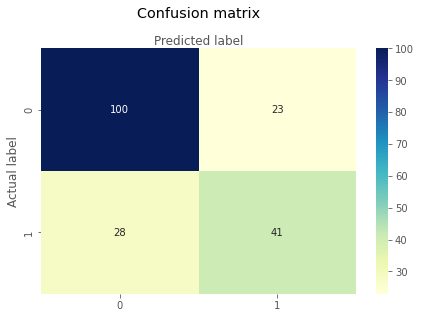

In [77]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [110]:
# This will become particularly important as we calculate our error metrics

X_train, X_test, label_train, label_test = train_test_split( df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']],df['Outcome'], \
                                                            test_size=0.3, random_state=42)

lm = LogisticRegression(C = 0.95,max_iter=1000)
lm.fit(X_train, label_train)
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(X_train, label_train)))
print("Test set: {:6.2f}%".format(100*logit.score(X_test, label_test)))

The score for logistic regression is
Training:  78.40%
Test set:  73.59%


In [71]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

In [78]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.734375
Precision: 0.640625
Recall: 0.5942028985507246


In [169]:
# using the new threshold of 0.06
y_predict = (lm.predict_proba(X_test)[:,1] > 0.06)
print("Threshold of 0.06:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))

Threshold of 0.06:
Precision: 0.3816,   Recall: 0.9875


# Bagging Algorithms

In [165]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier().fit(X_train,y_train )
dt_y_pred = dt_model.predict(X_test)
#Model Score
from sklearn.metrics import accuracy_score
print('The decision Tree model accuracy score was {}% on test dataset'.format(round(accuracy_score(dt_y_pred, y_test)*100)))

The decision Tree model accuracy score was 69% on test dataset


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_model = RandomForestClassifier(max_features=8).fit(X_train,y_train)
rf_y_pred = rf_model.predict(X_test)
print('The Random Forest model accuracy score was {}% on test dataset'.format(round(accuracy_score(rf_y_pred, y_test)*100)))

The Random Forest model accuracy score was 72% on test dataset


In [168]:
# Random forest
from sklearn.ensemble import ExtraTreesClassifier

et_model = ExtraTreesClassifier(max_features=8).fit(X_train,y_train)
et_y_pred = rf_model.predict(X_test)
print('The Extra Trees model accuracy score was {}% on test dataset'.format(round(accuracy_score(rf_y_pred, y_test)*100)))

The Extra Trees model accuracy score was 72% on test dataset


# Boosting Algorithms

# AdaBoost

In [92]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()

In [95]:
pred=ad.fit(X_train,y_train).predict(X_test)

In [97]:
accuracy_score(y_test,pred)

0.7402597402597403

# XGBoost

In [87]:
#Split data into 3: 60% train, 20% validation, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.3, random_state=42)

In [88]:
gbm = xgb.XGBClassifier( 
                        n_estimators=30000,
                        max_depth=4,
                        objective='binary:logistic', #new objective
                        learning_rate=.05, 
                        subsample=.8,
                        min_child_weight=3,
                        colsample_bytree=.8
                       )

eval_set=[(X_train,y_train),(X_val,y_val)]
fit_model = gbm.fit( 
                    X_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='error', #new evaluation metric: classification error (could also use AUC, e.g.)
                    early_stopping_rounds=50,
                    verbose=False
                   )

accuracy_score(y_test, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit)) 

C:\Users\f-al-\.conda\envs\metis\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\f-al-\.conda\envs\metis\lib\site-packages\xgboost\core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


0.7792207792207793